<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/master/notebooks/T2_2_Data_Cleaning_Funciones_de_distribución_de_probabilidad_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clonamos el repositorio para obtener los dataSet

In [1]:
!git clone https://github.com/joanby/python-ml-course.git

Cloning into 'python-ml-course'...
remote: Enumerating objects: 17387, done.
remote: Total 17387 (delta 0), reused 0 (delta 0), pack-reused 17387
Receiving objects: 100% (17387/17387), 512.33 MiB | 27.14 MiB/s, done.
Resolving deltas: 100% (128/128), done.
Checking out files: 100% (16900/16900), done.


# Damos acceso a nuestro Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Test it

In [ ]:
!ls '/content/drive/My Drive' 

# Google colab tools

In [2]:
from google.colab import files # Para manejar los archivos y, por ejemplo, exportar a su navegador
import glob # Para manejar los archivos y, por ejemplo, exportar a su navegador
from google.colab import drive # Montar tu Google drive

# Python3.8

In [3]:
!python3 --version

Python 3.6.9


# Colab no permite actualizar la version de python, asi que utilizamos miniconda

### Tener paciencia y esperar 1 minuto

In [4]:
!wget -O mini.sh https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh > /dev/null 2>&1
!chmod +x mini.sh
!bash ./mini.sh -b -f -p /usr/local > /dev/null 2>&1
!conda install -q -y --prefix /usr/local jupyter > /dev/null 2>&1
!python -m ipykernel install --name "py38" --user > /dev/null 2>&1

### La celda de abajo, ejecutar cada vez que reinicies el kernel.

In [5]:
import sys
#si usamos append nos coge la libreria de python3.6, ya que el so lee de forma secuencial la lista de librerias
_ = (sys.path.insert(0,"/usr/local/lib/python3.8/site-packages")) #folder librerias python
sys.path

['/usr/local/lib/python3.8/site-packages',
 '',
 '/env/python',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.6/dist-packages/IPython/extensions',
 '/root/.ipython']

In [6]:
!conda install numpy scipy matplotlib pandas --yes > /dev/null 2>&1
!conda install -c conda-forge statsmodels  --yes > /dev/null 2>&1
!conda install --channel conda-forge featuretools --yes > /dev/null 2>&1

In [7]:
!python3 --version

Python 3.8.3


# Funciones de distribución de probabilidades
## Distribución Uniforme

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [9]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100308., 100171., 100114.,  99777.,  99990.,  99983.,  99747.,
        100238.,  99995.,  99677.]),
 array([ 1.00001447, 10.90001262, 20.80001077, 30.70000893, 40.60000708,
        50.50000523, 60.40000338, 70.30000153, 80.19999968, 90.09999783,
        99.99999598]),
 <a list of 10 Patch objects>)

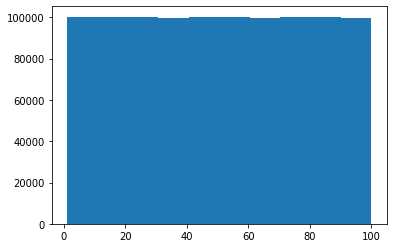

In [10]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [11]:
data = np.random.randn(1000000)

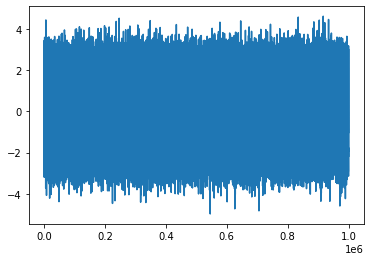

In [12]:
x = range(1,1000001)
plt.plot(x, data)

(array([3.30000e+01, 1.08900e+03, 1.67730e+04, 1.09376e+05, 3.02079e+05,
        3.52840e+05, 1.76934e+05, 3.75650e+04, 3.19400e+03, 1.17000e+02]),
 array([-4.97741706, -4.01764807, -3.05787908, -2.09811009, -1.1383411 ,
        -0.17857211,  0.78119687,  1.74096586,  2.70073485,  3.66050384,
         4.62027283]),
 <a list of 10 Patch objects>)

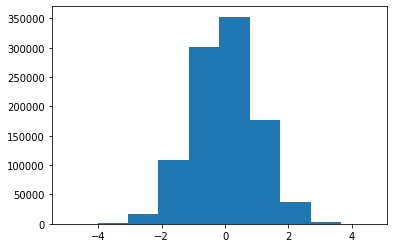

In [13]:
%matplotlib inline
plt.hist(data)

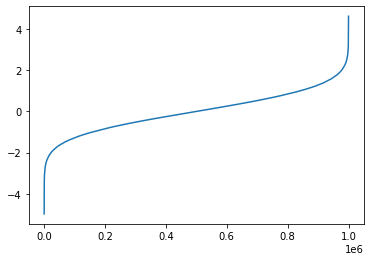

In [14]:
plt.plot(x,sorted(data))

(array([  22.,  127.,  582., 1506., 2608., 2652., 1655.,  672.,  159.,
          17.]),
 array([-3.47144389, -1.70067807,  0.07008775,  1.84085356,  3.61161938,
         5.3823852 ,  7.15315102,  8.92391684, 10.69468266, 12.46544847,
        14.23621429]),
 <a list of 10 Patch objects>)

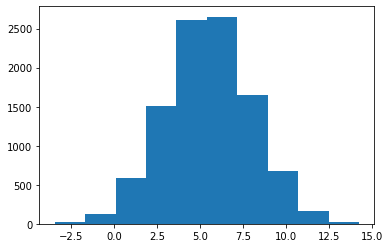

In [15]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [16]:
data = np.random.randn(2,4)
data

array([[ 0.99177031, -0.70998358,  1.03457045, -0.22212607],
       [ 0.62054125,  1.173002  ,  3.1082762 ,  1.09460459]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [17]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.1433699999999987


(3.1433699999999987, [<matplotlib.lines.Line2D at 0x7f8bfecf1438>])

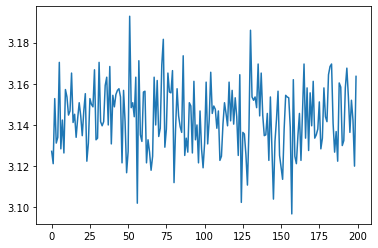

In [18]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [19]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [20]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000058,1.500887,18.506358
std,1.000586,2.499281,7.789342
min,-4.841641,-10.833149,5.000002
25%,-0.675178,-0.188913,11.758476
50%,0.000061,1.497069,18.514356
75%,0.676619,3.187120,25.240368
max,5.401899,14.059232,31.999959


(array([7.80000e+01, 2.51500e+03, 3.60980e+04, 1.89891e+05, 3.81211e+05,
        2.94184e+05, 8.62250e+04, 9.39400e+03, 3.93000e+02, 1.10000e+01]),
 array([-4.84164086, -3.81728691, -2.79293296, -1.768579  , -0.74422505,
         0.2801289 ,  1.30448285,  2.3288368 ,  3.35319075,  4.37754471,
         5.40189866]),
 <a list of 10 Patch objects>)

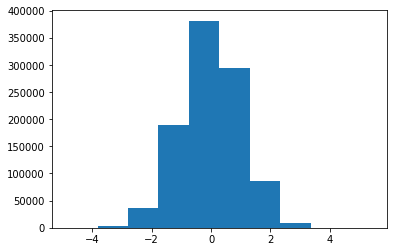

In [21]:
plt.hist(data["A"])

(array([4.30000e+01, 1.58300e+03, 2.39810e+04, 1.45071e+05, 3.47788e+05,
        3.32130e+05, 1.28549e+05, 1.96690e+04, 1.15500e+03, 3.10000e+01]),
 array([-10.83314907,  -8.34391094,  -5.85467282,  -3.36543469,
         -0.87619657,   1.61304156,   4.10227969,   6.59151781,
          9.08075594,  11.56999406,  14.05923219]),
 <a list of 10 Patch objects>)

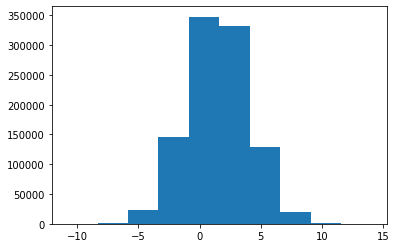

In [22]:
plt.hist(data["B"])

(array([ 99759., 100073.,  99421.,  99728., 100484., 100385.,  99804.,
        100357., 100312.,  99677.]),
 array([ 5.00000208,  7.69999777, 10.39999346, 13.09998916, 15.79998485,
        18.49998054, 21.19997623, 23.89997192, 26.59996761, 29.2999633 ,
        31.99995899]),
 <a list of 10 Patch objects>)

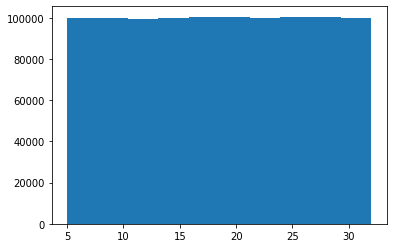

In [23]:
plt.hist(data["C"])

In [25]:
data = pd.read_csv("/content/python-ml-course/datasets/customer-churn-model/Customer Churn Model.txt")

In [26]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [27]:
colum_names = data.columns.values.tolist()

In [28]:
a = len(colum_names)
a

21

In [29]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [30]:
new_data

,Column Name,A,B
42,State,0.198874,0.991034
43,Account Length,0.648625,0.977491
44,Area Code,0.364720,0.224356
45,Phone,0.266507,0.310973
46,Int'l Plan,-0.599820,0.667468
47,VMail Plan,0.733972,0.711095
48,VMail Message,0.273934,0.288903
49,Day Mins,-0.186695,0.568043
50,Day Calls,0.360108,0.019369
51,Day Charge,-0.249079,0.502694
